# **DATA CLEANING**

In [122]:
import numpy as np
import pandas as pd

In [123]:
#reading and examining the dataset 
df = pd.read_csv('../input/laptop-prices/laptops.csv', encoding='latin-1')
df.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [124]:
#dropping the GB from ram, and changing it to a numeric value
df['Ram'] = df['Ram'].replace('[GB]', '', regex=True)
df['Ram'] = pd.to_numeric(df['Ram'])
df.rename(columns={'Ram':'Ram (GB)'}, inplace=True)

#remove the 'KG' and change to numeric
df['Weight'] = df['Weight'].replace('[kg]', '', regex=True)
df['Weight'] = pd.to_numeric(df['Weight'])
df.rename(columns={'Weight':'Weight (Kg)'}, inplace=True)

In [125]:
#first split at fist space to get size and type
split_mem = df['Memory'].str.split(' ', 1, expand=True)

#now assign the new columns to original DF
df['Storage Type'] = split_mem[1]
df['Memory'] = split_mem[0]

In [126]:
df['Memory'].unique()

array(['128GB', '256GB', '512GB', '500GB', '1TB', '32GB', '64GB', '2TB',
       '1.0TB', '16GB', '180GB', '240GB', '8GB', '508GB'], dtype=object)

In [127]:
df['Memory'] = df['Memory'].replace('1.0TB', '1000GB')
df['Memory'] = df['Memory'].replace('1TB', '1000GB')
df['Memory'] = df['Memory'].replace('2TB', '2000GB')

In [128]:
#dropping the GB from Memory, and changing it to a numeric value
df['Memory'] = df['Memory'].replace('[GB]', '', regex=True)
df['Memory'] = pd.to_numeric(df['Memory'])
df.rename(columns={'Memory':'Memory (GB)'}, inplace=True)

In [129]:
split_vendor = df['Cpu'].str.split(' ', 1, expand=True)

#now assign the new columns to original DF
df['Cpu Vendor'] = split_vendor[0]
df['Cpu'] = split_vendor[1]

split_type= df['Cpu'].str.split(' ', 1, expand=True)
split_type

#now we are going to take the cpu speed, this time we dont do expand=True
df['Cpu'] = df['Cpu'].str.split()
df['Cpu Speed'] = df['Cpu'].str.get(-1)

In [130]:
#dropping the GHz from Cpu Speed, and changing it to a numeric value
df['Cpu Speed'] = df['Cpu Speed'].replace('[GHz]', '', regex=True)
df['Cpu Speed'] = pd.to_numeric(df['Cpu Speed'])
df.rename(columns={'Cpu Speed':'Cpu Speed (GHz)'}, inplace=True)

In [131]:
df['ScreenResolution'] = df['ScreenResolution'].str.split()
df['ScreenResolution'] = df['ScreenResolution'].str.get(-1)
df[['Screen Width', 'Screen Height']] = df['ScreenResolution'].str.split('x', expand=True)
df['Screen Width'] = pd.to_numeric(df['Screen Width'])
df['Screen Height'] = pd.to_numeric(df['Screen Height'])

In [132]:
#create GPU vendor
temp = df['Gpu'].str.split()
df['Gpu Vendor'] = temp.str.get(0)

In [133]:
df = df.drop(['Unnamed: 0', 'Product', 'ScreenResolution', 'Cpu', 'Gpu'], axis=1)

In [134]:
df.head()

,Company,TypeName,Inches,Ram (GB),Memory (GB),OpSys,Weight (Kg),Price_euros,Storage Type,Cpu Vendor,Cpu Speed (GHz),Screen Width,Screen Height,Gpu Vendor
0,Apple,Ultrabook,13.3,8,128,macOS,1.37,1339.69,SSD,Intel,2.3,2560,1600,Intel
1,Apple,Ultrabook,13.3,8,128,macOS,1.34,898.94,Flash Storage,Intel,1.8,1440,900,Intel
2,HP,Notebook,15.6,8,256,No OS,1.86,575.00,SSD,Intel,2.5,1920,1080,Intel
3,Apple,Ultrabook,15.4,16,512,macOS,1.83,2537.45,SSD,Intel,2.7,2880,1800,AMD
4,Apple,Ultrabook,13.3,8,256,macOS,1.37,1803.60,SSD,Intel,3.1,2560,1600,Intel


# **EDA**

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='TypeName', ylabel='Price_euros'>

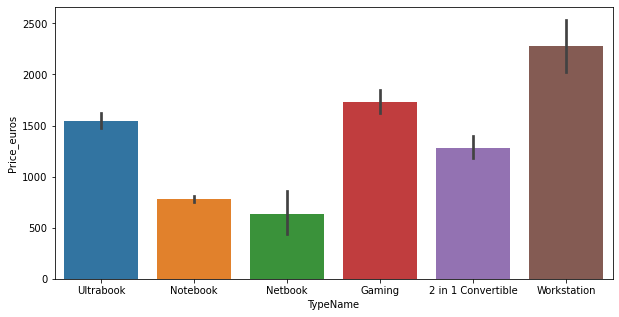

In [136]:
plt.subplots(figsize=(10,5))
sns.barplot(x='TypeName',y='Price_euros',data=df)

<AxesSubplot:xlabel='Ram (GB)', ylabel='Price_euros'>

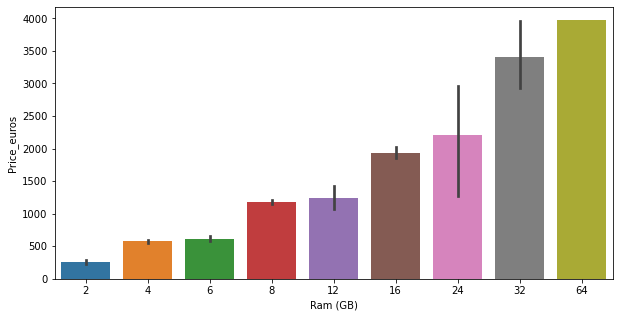

In [137]:
plt.subplots(figsize=(10,5))
sns.barplot(x='Ram (GB)',y='Price_euros',data=df)

<AxesSubplot:xlabel='Inches', ylabel='Price_euros'>

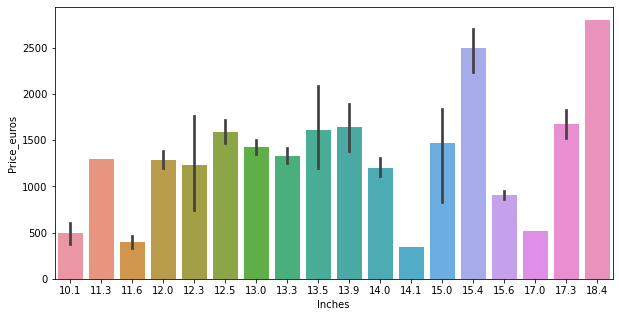

In [138]:
plt.subplots(figsize=(10,5))
sns.barplot(x='Inches',y='Price_euros',data=df)

<AxesSubplot:xlabel='Cpu Vendor', ylabel='Price_euros'>

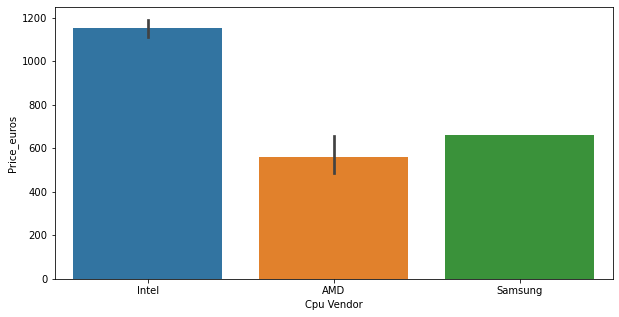

In [139]:
plt.subplots(figsize=(10,5))
sns.barplot(x='Cpu Vendor',y='Price_euros',data=df)

# **MODEL**

In [140]:
target = df['Price_euros']
df = df.drop(['Price_euros'], axis=1)

In [141]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Company']= label_encoder.fit_transform(df['Company'])
df['TypeName']= label_encoder.fit_transform(df['TypeName'])
df['OpSys']= label_encoder.fit_transform(df['OpSys'])
df['Storage Type']= label_encoder.fit_transform(df['Storage Type'])
df['Cpu Vendor']= label_encoder.fit_transform(df['Cpu Vendor'])
df['Gpu Vendor']= label_encoder.fit_transform(df['Gpu Vendor'])

df.head()

,Company,TypeName,Inches,Ram (GB),Memory (GB),OpSys,Weight (Kg),Storage Type,Cpu Vendor,Cpu Speed (GHz),Screen Width,Screen Height,Gpu Vendor
0,1,4,13.3,8,128,8,1.37,5,1,2.3,2560,1600,2
1,1,4,13.3,8,128,8,1.34,0,1,1.8,1440,900,2
2,7,3,15.6,8,256,4,1.86,5,1,2.5,1920,1080,2
3,1,4,15.4,16,512,8,1.83,5,1,2.7,2880,1800,0
4,1,4,13.3,8,256,8,1.37,5,1,3.1,2560,1600,2


In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.33, random_state=0)

In [143]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
model=LinearRegression()
model.fit(X_train,y_train)
preds=model.predict(X_test)
r2score=r2_score(y_test,preds)
MAE = mean_absolute_error(y_test, preds)
print("R2 score: %.2f"%(r2score))
print("MAE: %d"%(MAE))

R2 score: 0.68
MAE: 296


In [144]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train,y_train)
preds=model.predict(X_test)
r2score=r2_score(y_test, preds)
MAE = mean_absolute_error(y_test, preds)
print("R2 score: %.2f"%(r2score))
print("MAE: %d"%(MAE))

R2 score: 0.79
MAE: 192


In [154]:
from keras.models import Sequential
from keras.layers import Dense
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(16, kernel_initializer='he_normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(32, kernel_initializer='he_normal',activation='relu'))
NN_model.add(Dense(16, kernel_initializer='he_normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='he_normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 16)                224       
_________________________________________________________________
dense_44 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_45 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 17        
Total params: 1,313
Trainable params: 1,313
Non-trainable params: 0
_________________________________________________________________


In [155]:
history = NN_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=16)

Epoch 1/500
55/55 [==============================] - 1s 8ms/step - loss: 1353.0510 - mean_absolute_error: 1353.0510 - val_loss: 622.8970 - val_mean_absolute_error: 622.8970
Epoch 2/500
55/55 [==============================] - 0s 5ms/step - loss: 529.4517 - mean_absolute_error: 529.4517 - val_loss: 449.3226 - val_mean_absolute_error: 449.3226
Epoch 3/500
55/55 [==============================] - 0s 3ms/step - loss: 477.8900 - mean_absolute_error: 477.8900 - val_loss: 436.5135 - val_mean_absolute_error: 436.5135
Epoch 4/500
55/55 [==============================] - 0s 3ms/step - loss: 408.9392 - mean_absolute_error: 408.9392 - val_loss: 419.2401 - val_mean_absolute_error: 419.2401
Epoch 5/500
55/55 [==============================] - 0s 3ms/step - loss: 409.4287 - mean_absolute_error: 409.4287 - val_loss: 416.7449 - val_mean_absolute_error: 416.7449
Epoch 6/500
55/55 [==============================] - 0s 3ms/step - loss: 401.2304 - mean_absolute_error: 401.2304 - val_loss: 410.8026 - val_me

In [156]:
preds=NN_model.predict(X_test)
r2score=r2_score(y_test, preds)
MAE = mean_absolute_error(y_test, preds)
print("R2 score: %.2f"%(r2score))
print("MAE: %d"%(MAE))

R2 score: 0.68
MAE: 283


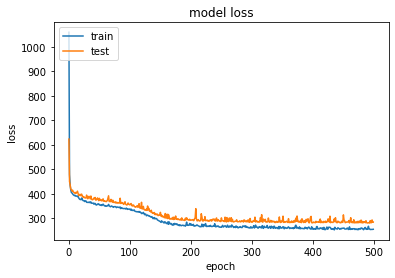

In [157]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()